<a href="https://colab.research.google.com/github/Pedro-Gianini/EX2_GEOPY/blob/main/EX2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**E1** - **Crie um polígono a partir de uma lista de coordenadas**

a) Crie um polígono a partir das coordenadas x e y dadas no arquivo coords.txt

In [1]:
#montando o acesso ao Google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
#Instalando a biblioteca Geopandas
!pip install geopandas -q

In [3]:
#Importando a biblioteca Geopandas
import geopandas as gpd

In [4]:
#Definindo o local em que o arquivo com as coordenadas se encontra
txt_path='/content/drive/MyDrive/PYGEO/M2/coords.txt'

#Abrindo o arquivo
f=open(txt_path, 'r')

#lendo o arquivo de texto
conteudo=f.read()
print(conteudo)

x= [333606.2023538671, 333640.29035389214, 333811.7203538375, 334006.937353739, 334119.9713536826, 334193.43435364374, 334662.173353408, 334762.3853533595, 335257.8533531074, 335469.8493530032, 335404.4943530464, 335375.1063530736, 335370.22035307565, 335356.59035308374, 335350.1103530858, 335353.9103530833, 335355.67035308306, 335357.2703530828, 335360.7803530821, 335364.0003530807, 335367.83035407774, 335373.1103530746, 335375.4203530743, 335376.59035307175, 335376.59035307507, 335375.0203530759, 335375.2403530758, 335376.20035407593, 335377.4803540751, 335378.72035307565, 335380.3003530725, 335382.87035307265, 335383.31035307294, 335382.92035307345, 335381.3603540753, 335380.27035307593, 335380.390353075, 335381.96035307285, 335384.3803540728, 335387.12035407266, 335389.99035307136, 335396.71035306633, 335399.63035306643, 335399.59035306703, 335398.0203530682, 335395.59035307006, 335392.39035307075, 335391.0403530721, 335391.4703530722, 335394.1503540708, 335397.6803530714, 335398.9

In [5]:
#criar expressões para buscar textos, isto é, manipular o arquivo coords.txt----> Para isso importamos a biblioteca re para operações com operecações regulares (regex)
import re
# Use a função  re.split para quebrar o texto em múltiplos subtextos. A quebra será feita onde houver o símbolo [ e o símbolo ]. 
#Na  regex usamos [] para indicar mais de um símbolo utilizado para realizar a quebra, e temso que utilizar \[ para indicar [, para que não seja entendido como um caracter especial.
# Por isso temos'[\[\]]'
items=re.split(r'[\[\]]',conteudo)

print(items)

['x= ', '333606.2023538671, 333640.29035389214, 333811.7203538375, 334006.937353739, 334119.9713536826, 334193.43435364374, 334662.173353408, 334762.3853533595, 335257.8533531074, 335469.8493530032, 335404.4943530464, 335375.1063530736, 335370.22035307565, 335356.59035308374, 335350.1103530858, 335353.9103530833, 335355.67035308306, 335357.2703530828, 335360.7803530821, 335364.0003530807, 335367.83035407774, 335373.1103530746, 335375.4203530743, 335376.59035307175, 335376.59035307507, 335375.0203530759, 335375.2403530758, 335376.20035407593, 335377.4803540751, 335378.72035307565, 335380.3003530725, 335382.87035307265, 335383.31035307294, 335382.92035307345, 335381.3603540753, 335380.27035307593, 335380.390353075, 335381.96035307285, 335384.3803540728, 335387.12035407266, 335389.99035307136, 335396.71035306633, 335399.63035306643, 335399.59035306703, 335398.0203530682, 335395.59035307006, 335392.39035307075, 335391.0403530721, 335391.4703530722, 335394.1503540708, 335397.6803530714, 335

In [6]:
#iterar todos os itens do arquivo de texto - mostrar o conteúdo - indicar o index da lista
#Para isso usa - se um loop para verificar em quantos e quais items o texto foi subdividido
for i in items:
  print(items.index(i))
  print(i)

0
x= 
1
333606.2023538671, 333640.29035389214, 333811.7203538375, 334006.937353739, 334119.9713536826, 334193.43435364374, 334662.173353408, 334762.3853533595, 335257.8533531074, 335469.8493530032, 335404.4943530464, 335375.1063530736, 335370.22035307565, 335356.59035308374, 335350.1103530858, 335353.9103530833, 335355.67035308306, 335357.2703530828, 335360.7803530821, 335364.0003530807, 335367.83035407774, 335373.1103530746, 335375.4203530743, 335376.59035307175, 335376.59035307507, 335375.0203530759, 335375.2403530758, 335376.20035407593, 335377.4803540751, 335378.72035307565, 335380.3003530725, 335382.87035307265, 335383.31035307294, 335382.92035307345, 335381.3603540753, 335380.27035307593, 335380.390353075, 335381.96035307285, 335384.3803540728, 335387.12035407266, 335389.99035307136, 335396.71035306633, 335399.63035306643, 335399.59035306703, 335398.0203530682, 335395.59035307006, 335392.39035307075, 335391.0403530721, 335391.4703530722, 335394.1503540708, 335397.6803530714, 3353

In [7]:
#mostrando as coordenadas de X
(items[1])

'333606.2023538671, 333640.29035389214, 333811.7203538375, 334006.937353739, 334119.9713536826, 334193.43435364374, 334662.173353408, 334762.3853533595, 335257.8533531074, 335469.8493530032, 335404.4943530464, 335375.1063530736, 335370.22035307565, 335356.59035308374, 335350.1103530858, 335353.9103530833, 335355.67035308306, 335357.2703530828, 335360.7803530821, 335364.0003530807, 335367.83035407774, 335373.1103530746, 335375.4203530743, 335376.59035307175, 335376.59035307507, 335375.0203530759, 335375.2403530758, 335376.20035407593, 335377.4803540751, 335378.72035307565, 335380.3003530725, 335382.87035307265, 335383.31035307294, 335382.92035307345, 335381.3603540753, 335380.27035307593, 335380.390353075, 335381.96035307285, 335384.3803540728, 335387.12035407266, 335389.99035307136, 335396.71035306633, 335399.63035306643, 335399.59035306703, 335398.0203530682, 335395.59035307006, 335392.39035307075, 335391.0403530721, 335391.4703530722, 335394.1503540708, 335397.6803530714, 335398.9003

In [8]:
#Quebrando texto em multiplos textos a cada virgula. Toda vez que é encontrado uma vírgula(,)
(items[1]).split(',')

['333606.2023538671',
 ' 333640.29035389214',
 ' 333811.7203538375',
 ' 334006.937353739',
 ' 334119.9713536826',
 ' 334193.43435364374',
 ' 334662.173353408',
 ' 334762.3853533595',
 ' 335257.8533531074',
 ' 335469.8493530032',
 ' 335404.4943530464',
 ' 335375.1063530736',
 ' 335370.22035307565',
 ' 335356.59035308374',
 ' 335350.1103530858',
 ' 335353.9103530833',
 ' 335355.67035308306',
 ' 335357.2703530828',
 ' 335360.7803530821',
 ' 335364.0003530807',
 ' 335367.83035407774',
 ' 335373.1103530746',
 ' 335375.4203530743',
 ' 335376.59035307175',
 ' 335376.59035307507',
 ' 335375.0203530759',
 ' 335375.2403530758',
 ' 335376.20035407593',
 ' 335377.4803540751',
 ' 335378.72035307565',
 ' 335380.3003530725',
 ' 335382.87035307265',
 ' 335383.31035307294',
 ' 335382.92035307345',
 ' 335381.3603540753',
 ' 335380.27035307593',
 ' 335380.390353075',
 ' 335381.96035307285',
 ' 335384.3803540728',
 ' 335387.12035407266',
 ' 335389.99035307136',
 ' 335396.71035306633',
 ' 335399.6303530664

In [9]:
#Quebrando texto em multiplos textos a cada virgula. Toda vez que é encontrado uma vírgula(,) --> e quando encontrar um elemento , transforme - o em numero decimal. 
#Desta forma as coordenadas ficaram no formato de texto para número fracionário
x=[float(i) for i in (items[1].split(','))]
y=[float(i) for i in (items[3].split(','))]

In [10]:
# Combine 1 a um as coordenadas de x e de y para gerar  tuplas de coordenadas
coord=tuple(zip(x,y))
# Mostre o resultado na tela
print(coord)

((333606.2023538671, 7362933.638975473), (333640.29035389214, 7361982.723975973), (333811.7203538375, 7361154.118976416), (334006.937353739, 7360992.221976502), (334119.9713536826, 7360956.197976516), (334193.43435364374, 7360932.784976532), (334662.173353408, 7360663.373976671), (334762.3853533595, 7360532.38797674), (335257.8533531074, 7360284.086976871), (335469.8493530032, 7360077.617976978), (335404.4943530464, 7359886.588977084), (335375.1063530736, 7359674.066977192), (335370.22035307565, 7359664.417977193), (335356.59035308374, 7359659.637977203), (335350.1103530858, 7359656.237977199), (335353.9103530833, 7359641.8879772145), (335355.67035308306, 7359635.177977217), (335357.2703530828, 7359630.737977218), (335360.7803530821, 7359624.75797722), (335364.0003530807, 7359621.097977225), (335367.83035407774, 7359620.267977225), (335373.1103530746, 7359618.3879772145), (335375.4203530743, 7359613.807977228), (335376.59035307175, 7359608.307977229), (335376.59035307507, 7359603.22797

In [11]:
# Importe as bibliotecas e objetos necessários
from shapely.geometry import Polygon

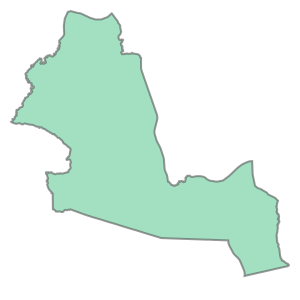

In [12]:
# Crie o polígono com as coordenadas  extraídas do txt
plg=Polygon(coord)
plg

b) Insira o polígono criado em um geodataframe

In [13]:
#criando um GeoDataFrame
gdf=gpd.GeoDataFrame()
gdf

""


In [14]:
#Add a coluna padrão para geometrias 'geometry'. Isto é, será criada uma coluna vazia chamada 'geometry' , para armazenar os dados de geometria
gdf['geometry']=None
gdf

<ipython-input-14-7267cfbcc7af>:2: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  gdf['geometry']=None


,geometry


In [15]:
#Tornando os parâmetros da coluna 'geometry' como as coordenadas já separadas antes. Ou seja será inserido a geometria do polígono plg na primeira linha da coluba geometry
gdf.loc[0,'geometry']=plg
gdf

,geometry
0,"POLYGON ((333606.202 7362933.639, 333640.290 7..."


**c) Salve o polígono em um shapefile**

In [16]:
#conferindo o sistema de coordenadas
gdf.crs

In [17]:
#definindo sistema de coordenadas
gdf=gdf.set_crs(crs='epsg:29183')
# Exporte o geodataframe para um shapefile
gdf.to_file('teste1.shp')

**d) Plote e salve uma figure do polígono**

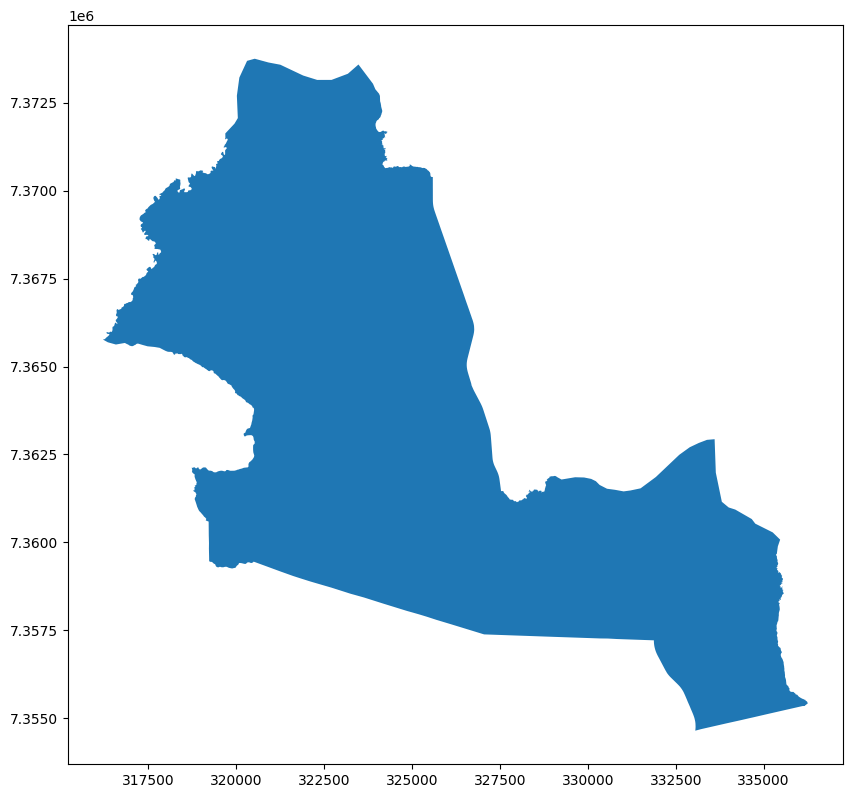

In [18]:
#para plotar vamos usar a biblioteca matplotlib
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(10,10))
gdf.plot(ax=ax)

# Salve o plto como uma figura jpg
fig.savefig('palheiros.jpg')

# ****EX2 - Criando pontos e plotando em um mapa****

a) Leia os dados com a biblioteca pandas

In [19]:
# Importe a biblioteca pandas para manipualr tabelas
import pandas as pd
# defina o caminho para o csv a ser lido
txt_path='/content/drive/MyDrive/PYGEO/M2/escooter.csv'
# Leia o csv
dados=pd.read_csv(txt_path)
# Verifique o topo dos dados
dados.head()

,Timestamp_Origin,Scooter_ID,Long_Origin,Lat_Origin,Battery_Origin,Timestamp_Destination,Long_Destination,Lat_Destination,Battery_Destination
0,2019-10-17 17:00:02,fdc4c29a-1688-45b5-95c9-3344c5d36383,-111.934998,33.413089,100,2019-10-17 17:43:02,-111.926139,33.421899,90
1,2019-10-17 01:43:02,2ed248d8-a488-4704-b5ee-53ea3b1fa806,-111.936201,33.394872,21,2019-10-17 01:51:02,-111.935023,33.399649,13
2,2019-10-18 00:42:01,08b10b5c-f00c-4021-8d71-1f86570a26fa,-111.928169,33.407396,96,2019-10-18 00:53:01,-111.941113,33.394684,63
3,2019-10-18 01:36:02,08b10b5c-f00c-4021-8d71-1f86570a26fa,-111.941115,33.394686,84,2019-10-18 01:54:01,-111.909366,33.392265,52
4,2019-10-18 02:08:40,08b10b5c-f00c-4021-8d71-1f86570a26fa,-111.909608,33.391719,67,2019-10-18 02:25:02,-111.927976,33.405108,51


b) Crie uma coluna vazia chamada geometry

In [20]:
# Adicione uma coluna vazia para  armazenar as geometrias
dados['geometry']=None
dados.head()

,Timestamp_Origin,Scooter_ID,Long_Origin,Lat_Origin,Battery_Origin,Timestamp_Destination,Long_Destination,Lat_Destination,Battery_Destination,geometry
0,2019-10-17 17:00:02,fdc4c29a-1688-45b5-95c9-3344c5d36383,-111.934998,33.413089,100,2019-10-17 17:43:02,-111.926139,33.421899,90,None
1,2019-10-17 01:43:02,2ed248d8-a488-4704-b5ee-53ea3b1fa806,-111.936201,33.394872,21,2019-10-17 01:51:02,-111.935023,33.399649,13,None
2,2019-10-18 00:42:01,08b10b5c-f00c-4021-8d71-1f86570a26fa,-111.928169,33.407396,96,2019-10-18 00:53:01,-111.941113,33.394684,63,None
3,2019-10-18 01:36:02,08b10b5c-f00c-4021-8d71-1f86570a26fa,-111.941115,33.394686,84,2019-10-18 01:54:01,-111.909366,33.392265,52,None
4,2019-10-18 02:08:40,08b10b5c-f00c-4021-8d71-1f86570a26fa,-111.909608,33.391719,67,2019-10-18 02:25:02,-111.927976,33.405108,51,None


c) Itere sob o dataframe e insira objetos do tipo LineString que conectem a origem e o destino de cada registro

In [21]:
# Importe o objeto do tipo linha
from shapely.geometry import LineString
# Itere sobre o dataframe para criar as linhas que conectam origem e destino das escooters
for index, row in dados.iterrows():
  # Use a função loc para especificar a célula once a geometria de linah criada deve ser armazenada
  # Crie a linha apartir das coordenadas de origem e estino da escooter
  dados.loc[index,'geometry']=LineString([(row['Long_Origin'],row['Lat_Origin']),(row['Long_Destination'],row['Lat_Destination'])])                                    

In [22]:
#verificando o topo dos dados
dados.head()

,Timestamp_Origin,Scooter_ID,Long_Origin,Lat_Origin,Battery_Origin,Timestamp_Destination,Long_Destination,Lat_Destination,Battery_Destination,geometry
0,2019-10-17 17:00:02,fdc4c29a-1688-45b5-95c9-3344c5d36383,-111.934998,33.413089,100,2019-10-17 17:43:02,-111.926139,33.421899,90,"LINESTRING (-111.934998 33.413089, -111.926139..."
1,2019-10-17 01:43:02,2ed248d8-a488-4704-b5ee-53ea3b1fa806,-111.936201,33.394872,21,2019-10-17 01:51:02,-111.935023,33.399649,13,"LINESTRING (-111.936201 33.394872, -111.935023..."
2,2019-10-18 00:42:01,08b10b5c-f00c-4021-8d71-1f86570a26fa,-111.928169,33.407396,96,2019-10-18 00:53:01,-111.941113,33.394684,63,"LINESTRING (-111.928169 33.407396, -111.941113..."
3,2019-10-18 01:36:02,08b10b5c-f00c-4021-8d71-1f86570a26fa,-111.941115,33.394686,84,2019-10-18 01:54:01,-111.909366,33.392265,52,"LINESTRING (-111.941115 33.394686, -111.909366..."
4,2019-10-18 02:08:40,08b10b5c-f00c-4021-8d71-1f86570a26fa,-111.909608,33.391719,67,2019-10-18 02:25:02,-111.927976,33.405108,51,"LINESTRING (-111.909608 33.391719, -111.927976..."


d) Coverta para um GeoDataFrame e defina o sistema de coordenadas (Lat Long WGS84)

In [23]:
# Verifique o tipo dos dados
type(dados)

pandas.core.frame.DataFrame

In [24]:
# Converta para um geodataframe
gdf=gpd.GeoDataFrame(dados)
# Verifique o resultado
gdf.head()

,Timestamp_Origin,Scooter_ID,Long_Origin,Lat_Origin,Battery_Origin,Timestamp_Destination,Long_Destination,Lat_Destination,Battery_Destination,geometry
0,2019-10-17 17:00:02,fdc4c29a-1688-45b5-95c9-3344c5d36383,-111.934998,33.413089,100,2019-10-17 17:43:02,-111.926139,33.421899,90,"LINESTRING (-111.93500 33.41309, -111.92614 33..."
1,2019-10-17 01:43:02,2ed248d8-a488-4704-b5ee-53ea3b1fa806,-111.936201,33.394872,21,2019-10-17 01:51:02,-111.935023,33.399649,13,"LINESTRING (-111.93620 33.39487, -111.93502 33..."
2,2019-10-18 00:42:01,08b10b5c-f00c-4021-8d71-1f86570a26fa,-111.928169,33.407396,96,2019-10-18 00:53:01,-111.941113,33.394684,63,"LINESTRING (-111.92817 33.40740, -111.94111 33..."
3,2019-10-18 01:36:02,08b10b5c-f00c-4021-8d71-1f86570a26fa,-111.941115,33.394686,84,2019-10-18 01:54:01,-111.909366,33.392265,52,"LINESTRING (-111.94111 33.39469, -111.90937 33..."
4,2019-10-18 02:08:40,08b10b5c-f00c-4021-8d71-1f86570a26fa,-111.909608,33.391719,67,2019-10-18 02:25:02,-111.927976,33.405108,51,"LINESTRING (-111.90961 33.39172, -111.92798 33..."


In [25]:
# Verifique o tipo dos dados
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [26]:
# Verifique o sistema de coordenadas. No caso por se mostrar vazio, significa que o Geodataframe ainda não possui coordenadas definidas
print(gdf.crs)

None


In [27]:
# Defina um sistema de coordenadas 
gdf=gdf.set_crs('epsg:4326')
# Verifique o sistema atribuído 
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

e) Salve o geodataframe como shapefile

In [28]:
# Salve o resultado em um shapefile
gdf.to_file('escooter_wgs84.shp')

<ipython-input-28-73cb889e16bc>:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file('escooter_wgs84.shp')


f) Crie uma figura dos dados com um mapa base de fundo

In [29]:
# Instale a contextily para obter mapas base
!pip install contextily -q

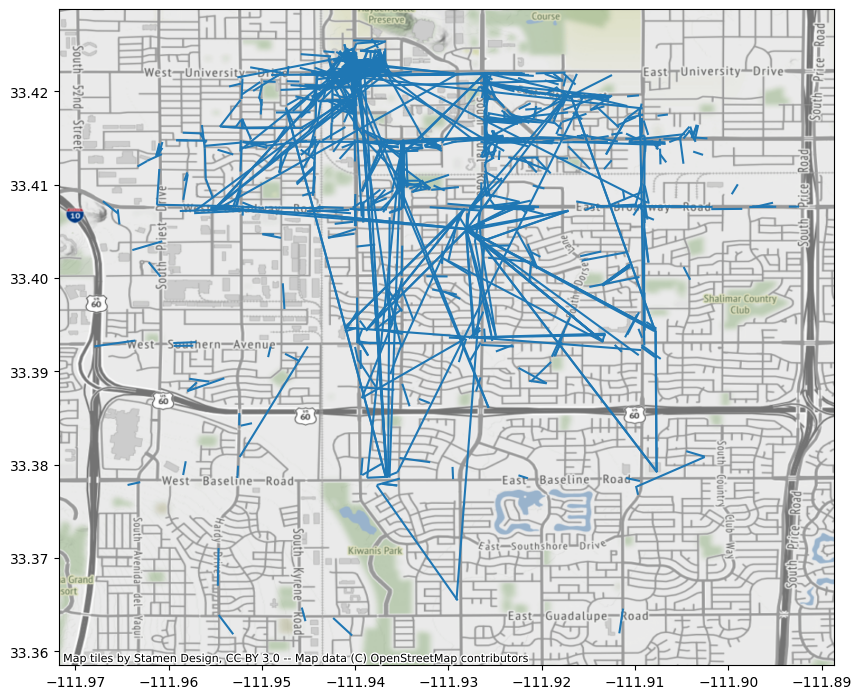

In [30]:
# Importe as bibliotecas que usaremos para plotagem
import matplotlib.pyplot as plt
import contextily as cx

# Crie a figura e eixo de plotagem. Defina o tamanho da figura
fig,ax= plt.subplots(figsize=(10,10))
#  Adicione as linhas das escooters ao eixo de plotagem
gdf.plot(ax=ax)
# Adicione o mapa base ao eixo de plotagem
cx.add_basemap(ax=ax,crs= gdf.crs)


# **E3 - Cálculo de distâncias**
Nosso objetivo é calcular a distância em metros que cada patinete elétrico percorreu e responder as seguintes perguntas:

*Qual foi a menor distância percorrida em km?
*Qual foi a distância média percorrida em km?
*Qual foi a distância máxima percorrida em km?

Reprojete os dados da projeção WGS84 para o EPSG:32612 (UTM Zona 12N - Zona UTM para o AZ - EUA)  para transformar os dados em sistema métrico.

In [31]:
#Reprojetando camadas para um sistema de coordenadas projetado
gdf_utm=gdf.to_crs('epsg:32612')
gdf_utm.crs

<Projected CRS: EPSG:32612>
Name: WGS 84 / UTM zone 12N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 114°W and 108°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Alberta; Northwest Territories (NWT); Nunavut; Saskatchewan. Mexico. United States (USA).
- bounds: (-114.0, 0.0, -108.0, 84.0)
Coordinate Operation:
- name: UTM zone 12N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [32]:
#calcular distancias
# cria coluna vazia para armazenar as distâncias
gdf_utm['dist']=None

# Itere sobre as linhas do geodataframe reprjetado
for index, row in gdf_utm.iterrows():
  # Calcule o comprimento das linhas entre origem e destino e armazene na coluna dis
  gdf_utm.loc[index,'dist']=row['geometry'].length/1000


In [33]:
# Verifique o resultado
gdf_utm.head()

,Timestamp_Origin,Scooter_ID,Long_Origin,Lat_Origin,Battery_Origin,Timestamp_Destination,Long_Destination,Lat_Destination,Battery_Destination,geometry,dist
0,2019-10-17 17:00:02,fdc4c29a-1688-45b5-95c9-3344c5d36383,-111.934998,33.413089,100,2019-10-17 17:43:02,-111.926139,33.421899,90,"LINESTRING (413064.141 3697474.187, 413896.573...",1.277783
1,2019-10-17 01:43:02,2ed248d8-a488-4704-b5ee-53ea3b1fa806,-111.936201,33.394872,21,2019-10-17 01:51:02,-111.935023,33.399649,13,"LINESTRING (412934.112 3695455.416, 413048.426...",0.540874
2,2019-10-18 00:42:01,08b10b5c-f00c-4021-8d71-1f86570a26fa,-111.928169,33.407396,96,2019-10-18 00:53:01,-111.941113,33.394684,63,"LINESTRING (413693.491 3696837.300, 412477.095...",1.853571
3,2019-10-18 01:36:02,08b10b5c-f00c-4021-8d71-1f86570a26fa,-111.941115,33.394686,84,2019-10-18 01:54:01,-111.909366,33.392265,52,"LINESTRING (412476.911 3695438.915, 415427.303...",2.96507
4,2019-10-18 02:08:40,08b10b5c-f00c-4021-8d71-1f86570a26fa,-111.909608,33.391719,67,2019-10-18 02:25:02,-111.927976,33.405108,51,"LINESTRING (415404.267 3695083.906, 413709.175...",2.263184


In [34]:
#extraindo a distancia mínima
min(gdf_utm['dist'])

0.09993247743334621

In [35]:
#vextraindo a distancia máxima
max(gdf_utm['dist'])

4.971918442559885

In [36]:
# Importe a biblioteca numpy para usar sua função de média
import numpy as np
# Extraia a distância média
np.mean(gdf_utm['dist'])

0.41090949433328555